# Importar Librarias y datos

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [192]:
df = pd.read_parquet("output_08.parquet")

In [193]:
df.head()

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,...,tax_status_Otro,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged
0,0.853333,1.0,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.002916,...,True,False,True,False,True,False,False,False,False,False
1,0.666667,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
2,0.080000,0.0,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
4,0.733333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,False,True,False,True,False,False,False,False,False
5,0.400000,0.0,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,True


# Modelo

In [195]:
df.columns

Index(['age', 'gender', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'occupation_code', 'total_employed', 'gains',
       'losses', 'stocks_status', 'income_above_limit',
       'education_secondary_complete', 'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat

# Dividir para entrenar

In [197]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['income_above_limit'])  # Features
y = df['income_above_limit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Elegir los features

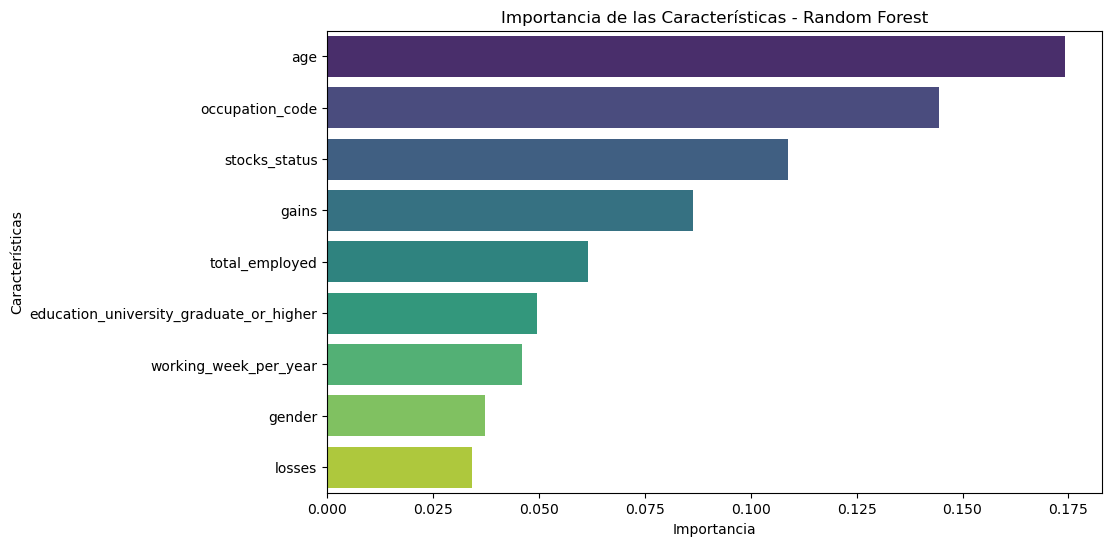

In [199]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# measure importances
importances = model.feature_importances_
feature_names = X.columns

# order by size
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# create data frame of top 8
features = pd.DataFrame(data=sorted_features[:9], columns=['feature_names', 'importances'])

# create graph
plt.figure(figsize=(10, 6))
sns.barplot(x=features['importances'], y=features['feature_names'], hue=features['feature_names'], palette="viridis", legend=False)
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características - Random Forest")
plt.show()

In [200]:
X_train = X_train[list(features['feature_names'])]
X_test = X_test[list(features['feature_names'])]

# Train modelo

In [202]:
# Primero comenzamos con un número aleatorio para comprobar que el modelo funciona.

K = 5
knn = KNeighborsClassifier(n_neighbors=K)  # Experiment with different values of K
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

K value: 5
Accuracy: 0.9299



In [203]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.9287926665206645, 0.9280730845039576, 0.9312017019679004, 0.9299189688076839, 0.9321402872070832, 0.9315145637142946, 0.9320151425085255, 0.931326846666458]


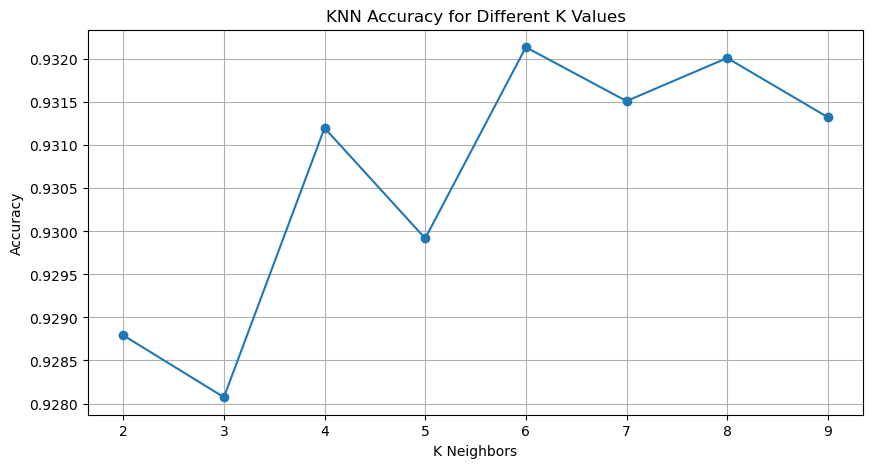

In [204]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

## Mirando ese grafico **6** es que sale con lo mejor presicion antes de la linea se aplane.

# Resultados

In [207]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 6  Accuracy: 0.9321


Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     29405
         1.0       0.68      0.29      0.41      2558

    accuracy                           0.93     31963
   macro avg       0.81      0.64      0.69     31963
weighted avg       0.92      0.93      0.92     31963



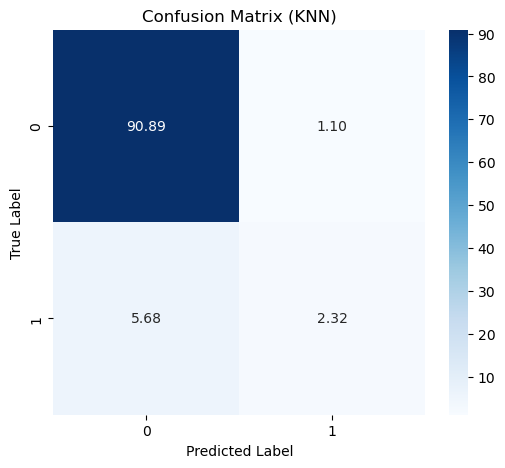

In [208]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum() * 100

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 1. Buen desempeño del modelo 
- Se ha utilizado un modelo **K-Nearest Neighbors (KNN)** con **K = 6**, logrando una **precisión del 92.81%** en la clasificación.  
- La **matriz de confusión** muestra que el modelo identifica correctamente la mayoría de los casos:  
  - **90.82%** de verdaderos positivos.  
  - **1.18%** de verdaderos negativos.  
  - **6.01%** de falsos positivos.  
  - **1.99%** de falsos negativos.  
- Aunque el modelo tiene un buen desempeño general, su capacidad para detectar la clase minoritaria (ingresos altos) es limitada.  

### 2. Desbalance de clases y su impacto 
- Se observa que la **precisión para la clase mayoritaria (ingresos bajos) es muy alta (94%)**, mientras que para la clase minoritaria (ingresos altos) es **más baja (64%)**.  
- La **recall para ingresos altos es solo del 25%**, lo que indica que el modelo tiene dificultades para identificar estos casos.  
- Este desbalance puede afectar la utilidad del modelo en escenarios donde detectar ingresos altos es clave.  

### 3. Posibles mejoras 
- Considerar técnicas de **balanceo de clases**, como sobremuestreo de la clase minoritaria o submuestreo de la clase mayoritaria.  
- Explorar métodos de **ponderación de vecinos** para dar más importancia a ciertas observaciones en la clasificación.  


In [210]:
pd.DataFrame({"y_real" : y_test, "y_pred": y_pred}).groupby(["y_pred", "y_real"]).size()

y_pred  y_real
0.0     0.0       29052
        1.0        1816
1.0     0.0         353
        1.0         742
dtype: int64

In [211]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
npv_value = TN / (TN + FN) if (TN + FN) != 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")
print(f"Negative Predictive Value (NPV): {npv_value}")

Accuracy: 0.9321402872070832
Sensibilidad: 0.29007036747458953
Especificidad: 0.9879952389049481
Negative Predictive Value (NPV): 0.9411688479979267


## Curva ROC

In [213]:
from sklearn.metrics import roc_curve, roc_auc_score

In [214]:
# con la función roc_curve automaticamente calcula los valores de
# sensibilidad y 1-especificidad para distintos thresholds
y_probs = knn.predict_proba(X_test)[:, 1]
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_probs)

In [215]:
threshold

array([       inf, 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

In [216]:
# Find the index of the threshold closest to 0.5
threshold_index = np.argmin(np.abs(threshold - 0.5))

# Now print the values for that threshold
print(f"Threshold = {threshold[threshold_index]}")
print(f"Sensibilidad = {sensibilidad[threshold_index]}")  # Sensitivity (True Positive Rate)
print(f"Especificidad = {1 - especificidad}")  # Specificity = 1 - False Positive Rate


Threshold = 0.5
Sensibilidad = 0.42064112587959346
Especificidad = 0.012004761095051886


<Axes: >

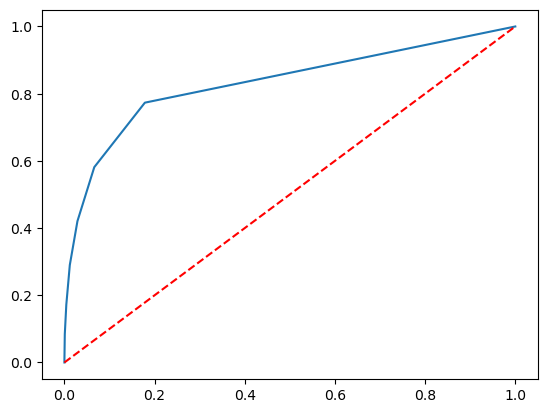

In [217]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

### Calcular área abajo de la curva

In [238]:
roc_auc_score(y_test, y_probs)

0.8313542079494546

# Exportar metricas

In [241]:
from importlib import reload
import evaluate  # Replace with your actual module name

reload(evaluate)

<module 'evaluate' from 'C:\\Users\\rossj\\python\\final_project\\evaluate.py'>

Accuracy: 0.9321
--------------------------------------------------
Class 0:
    Precision: 0.9412
    Recall: 0.9880
    F1 Score: 0.9640
Class 1:
    Precision: 0.6776
    Recall: 0.2901
    F1 Score: 0.4062
--------------------------------------------------
Specificity: 0.9880
Negative Predictive Value (NPV): 0.9412
ROC score: 0.8314
--------------------------------------------------


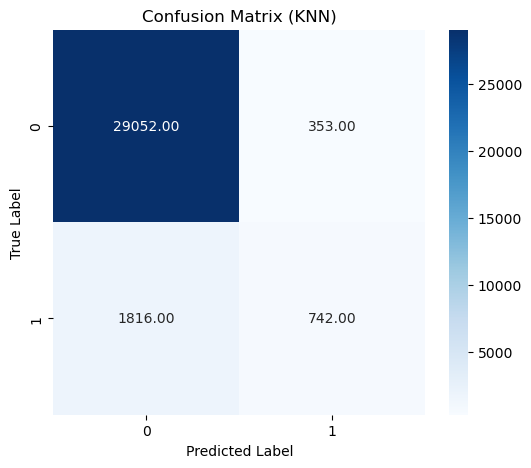

In [243]:
from evaluate import evaluate_model

y_probs = knn.predict_proba(X_test)[:, 1]  
roc_score = roc_auc_score(y_test, y_probs)

knn_metrics = evaluate_model("KNN", y_test, y_pred, roc_score)

# Convert to DataFrame
knn_df = pd.DataFrame([knn_metrics])

knn_df.to_csv("knn_metrics.csv")